### Functional API Examples

In [2]:
from keras.models import Sequential, Model
from keras import layers
from keras import Input


# Sequential example
seq_model = Sequential()
seq_model.add(layers.Dense(32, activation='relu', input_shape=(64, )))
seq_model.add(layers.Dense(32, activation='relu'))
seq_model.add(layers.Dense(10, activation='softmax'))

# Functional API equivalent
input_tensor = Input(shape=(64,))
x = layers.Dense(32, activation='relu')(input_tensor)
x = layers.Dense(32, activation='relu')(x)
output_tensor = layers.Dense(10, activation='softmax')(x)

model = Model(input_tensor, output_tensor)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                330       
Total params: 3,466
Trainable params: 3,466
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')

import numpy as np
x_train = np.random.random((1000, 64))
y_train = np.random.random((1000, 10))

model.fit(x_train, y_train, epochs=10, batch_size=128)

score = model.evaluate(x_train, y_train)

Epoch 1/10
1000/1000 [==============================] - 0s 124us/step - loss: 11.5512
Epoch 2/10
1000/1000 [==============================] - 0s 19us/step - loss: 11.5478
Epoch 3/10
1000/1000 [==============================] - 0s 19us/step - loss: 11.5462
Epoch 4/10
1000/1000 [==============================] - 0s 22us/step - loss: 11.5450
Epoch 5/10
1000/1000 [==============================] - 0s 20us/step - loss: 11.5442
Epoch 6/10
1000/1000 [==============================] - 0s 21us/step - loss: 11.5430
Epoch 7/10
1000/1000 [==============================] - 0s 20us/step - loss: 11.5422
Epoch 8/10
1000/1000 [==============================] - 0s 20us/step - loss: 11.5414
Epoch 9/10
1000/1000 [==============================] - 0s 19us/step - loss: 11.5405
Epoch 10/10
1000/1000 [==============================] - 0s 62us/step


In [10]:
score

11.537956123352052

### Multiple input text example

In [1]:
from keras.models import Model
from keras import layers
from keras import Input

text_vocabulary_size = 10000
question_vocabulary_size = 10000
answer_vocabulary_size = 500

text_input = Input(shape=(None,), dtype='int32', name='text')

embedded_text = layers.Embedding(
    64, text_vocabulary_size)(text_input)

encoded_text = layers.LSTM(32)(embedded_text)

question_input = Input(shape=(None,),
                       dtype='int32',
                       name='question')

embedded_question = layers.Embedding(
    32, question_vocabulary_size)(question_input)
encoded_question = layers.LSTM(32)(embedded_question)

concatenated = layers.concatenate([encoded_text, encoded_question], axis=-1)

answer = layers.Dense(answer_vocabulary_size,
                      activation='softmax')(concatenated)

model = Model([text_input, question_input], answer)

model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
              metrics=['acc'])

Using TensorFlow backend.


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
text (InputLayer)               (None, None)         0                                            
__________________________________________________________________________________________________
question (InputLayer)           (None, None)         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, None, 10000)  640000      text[0][0]                       
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, None, 10000)  320000      question[0][0]                   
__________________________________________________________________________________________________
lstm_1 (LS

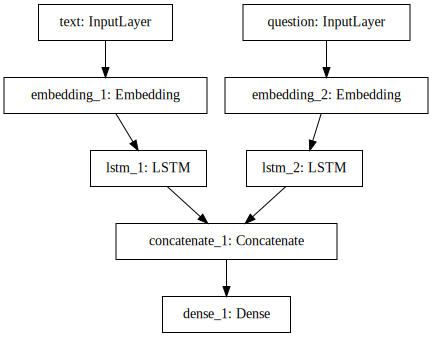

In [4]:
model.summary()
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

Feeding data in

In [7]:
import numpy as np

num_samples = 1000
max_length = 100

text = np.random.randint(1, text_vocabulary_size,
                         size=(num_samples, max_length))

question = np.random.randint(1, question_vocabulary_size,
                             size=(num_samples, max_length))
answers = np.random.randint(0, 1,
                            size=(num_samples, answer_vocabulary_size))

#model.fit([text, question], answers, epochs=10, batch_size=128)

model.fit({'text': text, 'question': question},
          answers, epochs=10, batch_size=128)

Epoch 1/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0000e+00 - acc: 0.6090
Epoch 2/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0000e+00 - acc: 0.6090
Epoch 3/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0000e+00 - acc: 0.6090
Epoch 4/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0000e+00 - acc: 0.6090
Epoch 5/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0000e+00 - acc: 0.6090
Epoch 6/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0000e+00 - acc: 0.6090
Epoch 7/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0000e+00 - acc: 0.6090
Epoch 8/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0000e+00 - acc: 0.6090
Epoch 9/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0000e+00 - acc: 0.6090
Epoch 10/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0000e+00 - a

### Multi-output

In [12]:
from keras import layers
from keras import Input
from keras.models import Model

vocabulary_size = 50000
num_income_groups = 10

posts_input = Input(shape=(None,), dtype='int32', name='posts')
embedded_posts = layers.Embedding(256, vocabulary_size)(posts_input)
x = layers.Conv1D(128, 5, activation='relu')(embedded_posts)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(256, 5, activation='relu')(x)
x = layers.Conv1D(256, 5, activation='relu')(x)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(256, 5, activation='relu')(x)
x = layers.Conv1D(256, 5, activation='relu')(x)
x = layers.MaxPooling1D(5)(x)
x = layers.Dense(128, activation='relu')(x)

age_prediction = layers.Dense(1, name='age')(x)
income_prediction = layers.Dense(num_income_groups,
                                 activation='softmax',
                                 name='income')(x)
gender_prediction = layers.Dense(1, activation='sigmoid', name='gender')(x)

model = Model(
    posts_input, [age_prediction, income_prediction, gender_prediction])

model.compile(optimizer='rmsprop',
              loss=['mse', 'categorical_crossentropy', 'binary_crossentropy'])

model.compile(optimizer='rmsprop',
              loss={'age': 'mse',
                    'income': 'categorical_crossentropy',
                    'gender': 'binary_crossentropy'})

# could weigh losses since the values will be in different ranges

model.compile(optimizer='rmsprop',
              loss={'age': 'mse',
                    'income': 'categorical_crossentropy',
                    'gender': 'binary_crossentropy'},
              loss_weights={'age': 0.23,
                            'income': 1.,
                            'gender': 10.})

#model.fit(age_targets, income_targets, gender_targets, epochs=10, batch_size=64)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
posts (InputLayer)              (None, None)         0                                            
__________________________________________________________________________________________________
embedding_7 (Embedding)         (None, None, 50000)  12800000    posts[0][0]                      
__________________________________________________________________________________________________
conv1d_17 (Conv1D)              (None, None, 128)    32000128    embedding_7[0][0]                
__________________________________________________________________________________________________
max_pooling1d_10 (MaxPooling1D) (None, None, 128)    0           conv1d_17[0][0]                  
__________________________________________________________________________________________________
conv1d_18 

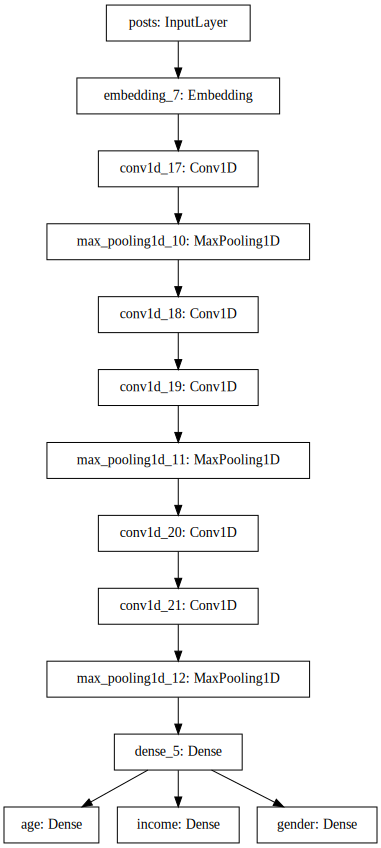

In [13]:
model.summary()
SVG(model_to_dot(model).create(prog='dot', format='svg'))

### Inception Network

In [15]:
from keras import layers

branch_a = layers.Conv2D(128, 1,
                        activation='relu', strides=2)(x)
branch_b = layers.conv2D(128, 1, activation='relu')(x)
branch_b = layers.conv2D(128, 3, activation='relu')(branch_b)

branch_c = layers.AveragePooling2D(3, strides=2)(x)
branch_c = layers.Conv2D(128, 3, activation='relu')(branch_c)

branch_d = layers.Conv2D(128, 1, activation='relu')(x)
branch_d = layers.Conv2D(128, 3, activation='relu')(branch_d)
branch_d = layers.Conv2D(128, 3, activation='relu')(branch_d)

output = layers.concatenate(
    [branch_a, branch_b, branch_c])


ValueError: Input 0 is incompatible with layer conv2d_2: expected ndim=4, found ndim=3

Residual Layer

In [ ]:
x = ...
y = layers.Conv2D(128, 3, activation='relu', padding = 'same')(x)
y = layers.Conv2D(128, 3, activation='relu', padding = 'same')(y)
y = layers.Conv2D(128, 3, activation='relu', padding = 'same')(y)

y = layers.add([y, x])